In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/dcu/Group-Project


In [10]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
mitre_dir = "data/MITRE-Range-Angle-Structured/"

In [6]:
fp = "data/MITRE-Range-Angle-Structured/set_10/log_2020-06-09T20.05.14.979Z.txt"
open(fp).read().split('\n')[:25]

['2020-06-09T20:05:27.051Z,app_name,BlueProx',
 '2020-06-09T20:05:27.044Z,app_ver,2.0(2.3)',
 '2020-06-09T20:05:27.045Z,scenario,structured_Test Protocol Full ',
 '2020-06-09T20:05:27.046Z,environment,medium room,center open',
 '2020-06-09T20:05:27.047Z,self_beacon_id,',
 '2020-06-09T20:05:27.048Z,self_on_body_location,in hand',
 '2020-06-09T20:05:27.049Z,self_pose,standing',
 '2020-06-09T20:05:27.050Z,self_activity,unknown',
 '2020-06-09T20:05:27.059Z,session_id,00D3F9EB-78C7-4061-A45A-ED1B790F903A',
 '2020-06-09T20:05:27.055Z,user_id,<removed>',
 '2020-06-09T20:05:27.057Z,self_user_id,<removed>',
 '2020-06-09T20:05:27.058Z,partner_tester, ,iPhone XR',
 '2020-06-09T20:05:27.059Z,self_tester, iPhone 8 Plus,<removed>',
 '2020-06-09T20:05:27.062Z,partner_beacon_id,BlueProxTx',
 '2020-06-09T20:05:27.060Z,partner_on_body_location,in hand',
 '2020-06-09T20:05:27.061Z,partner_pose,sitting',
 '2020-06-09T20:05:27.063Z,Range,3',
 '2020-06-09T20:05:27.064Z,Angle,0',
 '2020-06-09T20:05:27.077Z,A

In [84]:
def get_clyneices_iphone(fp):
    for line in open(fp).read().split('\n')[:20]:
        if "Clyneice’s iPhone".lower() in line.lower():
            return line
    return ''

lines = apply_fn_to_matrix_data_files(mitre_dir, get_clyneices_iphone)
for line in lines:
    if len(line) > 0:
        print(line)

100%|██████████| 70/70 [00:00<00:00, 263.65it/s]

2020-06-28T21:24:08.498Z,self_tester, iPhone 11,<removed>, Clyneice’s iPhone
2020-06-28T21:29:22.006Z,self_tester, iPhone 11,<removed>, Clyneice’s iPhone
2020-06-28T21:28:08.426Z,self_tester, iPhone 11,<removed>, Clyneice’s iPhone
2020-06-28T21:25:28.443Z,self_tester, iPhone 11,<removed>, Clyneice’s iPhone
2020-06-28T21:26:50.271Z,self_tester, iPhone 11,<removed>, Clyneice’s iPhone


In [11]:
def read_ble_from_file(fp):
    return [ float(line.split(',')[3])
            for line in open(fp).read().split('\n')
            if 'Bluetooth' in line ]

def apply_fn_to_matrix_data_files(dir_, fn, as_df=False):
    _apply_out = []
    folders = list(os.walk(dir_))
    for dirpath, dirnames, filenames in tqdm(folders, total=len(folders)):
        for filename in [f for f in filenames if f.endswith(".txt")]:
            fp = os.path.join(dirpath, filename)
            _apply_out.append(fn(fp))
    if as_df:
        return pd.DataFrame(_apply_out)
    return _apply_out

def to_dt(t):
    try:
        return datetime.strptime(t, '%Y-%m-%d %H:%M:%S.%f')
    except ValueError:
        return datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%fZ')

def t_diff(t1, t2):
    return abs((to_dt(t2) - to_dt(t1)).total_seconds())

def read_bluetooth_dataframe(fp):
    events, timestamps = [], []
    for line in open(fp).read().split('\n'):
        if 'Bluetooth' in line:
            items = line.split(',')
            _ble = items[3]
            _timestamp = items[0]
            if len(events) > 0:
                _t_diff = t_diff(_timestamp, timestamps[-1])
                t = events[-1]['Time'] + _t_diff
            else:
                t, _t_diff = 0., 0.
            events.append({
                "Time" : t,
                "Bluetooth" : float(_ble),
                "TimeDiff" : _t_diff
            })
            timestamps.append(_timestamp)
    return pd.DataFrame(events)

def read_bluetooth_chirps(fp):
    chirp, chirps, timestamps = [], [], []
    for line in open(fp).read().split('\n'):
        if 'Bluetooth' in line:
            
            items = line.split(',')
            _ble = items[3]
            _timestamp = items[0]
            if len(chirp) == 0 and len(chirps) == 0:
                t, _t_diff = 0., 0.
            else:
                
                _t_diff = t_diff(_timestamp, timestamps[-1])
                t = chirp[-1]['Time'] + _t_diff
            if _t_diff > 0.2:
                chirps.append(chirp)
                chirp = []
            chirp.append({
                "Time" : t,
                "Bluetooth" : _ble,
                "TimeDiff" : _t_diff
            })
            timestamps.append(_timestamp)
    chirps.append(chirp)
    return [ pd.DataFrame(chirp) for chirp in chirps ]

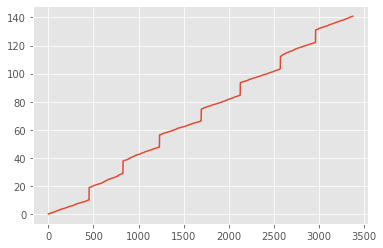

In [12]:
df = read_bluetooth_dataframe(fp)
plt.plot(df.Time)

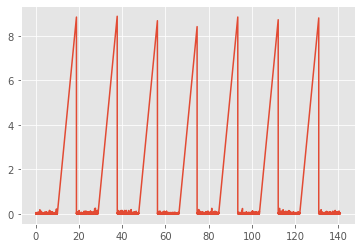

In [13]:
plt.plot(df.Time, df.TimeDiff)

## Make Data Frame

In [22]:
open(fp).read().split('\n')[:18]

['2020-06-09T20:05:27.051Z,app_name,BlueProx',
 '2020-06-09T20:05:27.044Z,app_ver,2.0(2.3)',
 '2020-06-09T20:05:27.045Z,scenario,structured_Test Protocol Full ',
 '2020-06-09T20:05:27.046Z,environment,medium room,center open',
 '2020-06-09T20:05:27.047Z,self_beacon_id,',
 '2020-06-09T20:05:27.048Z,self_on_body_location,in hand',
 '2020-06-09T20:05:27.049Z,self_pose,standing',
 '2020-06-09T20:05:27.050Z,self_activity,unknown',
 '2020-06-09T20:05:27.059Z,session_id,00D3F9EB-78C7-4061-A45A-ED1B790F903A',
 '2020-06-09T20:05:27.055Z,user_id,<removed>',
 '2020-06-09T20:05:27.057Z,self_user_id,<removed>',
 '2020-06-09T20:05:27.058Z,partner_tester, ,iPhone XR',
 '2020-06-09T20:05:27.059Z,self_tester, iPhone 8 Plus,<removed>',
 '2020-06-09T20:05:27.062Z,partner_beacon_id,BlueProxTx',
 '2020-06-09T20:05:27.060Z,partner_on_body_location,in hand',
 '2020-06-09T20:05:27.061Z,partner_pose,sitting',
 '2020-06-09T20:05:27.063Z,Range,3',
 '2020-06-09T20:05:27.064Z,Angle,0']

In [85]:
def get_headers(fp):
    lines = open(fp).read().split('\n')
    devices = {}
    for line in lines[:18]:
        if 'partner_tester' in line:
            a, b = line.split(',')[-2].strip(), line.split(',')[-1].strip()
            devices['TX'] = b if 'iphone' not in a.lower() else a
        if 'self_tester' in line:
            if "Clyneice’s iPhone".lower() in line.lower():
                devices['RX'] = line.split(',')[-3].strip()
                continue
            a, b = line.split(',')[-2].strip(), line.split(',')[-1].strip()
            devices['RX'] = b if 'iphone' not in a.lower() else a
        if 'environment' in line:
            _, _, e1, e2 = line.split(',')
            devices['Environment_1'] = e1.strip()
            devices['Environment_2'] = e2.strip()
        if 'Range' in line:
            devices['Range'] = float(line.split(',')[-1])
        if 'Angle' in line:
            devices['Angle'] = float(line.split(',')[-1])
    devices['Bluetooth'] = read_ble_from_file(fp)
    return devices

In [86]:
data = apply_fn_to_matrix_data_files(mitre_dir, get_headers, as_df=True)
data

100%|██████████| 70/70 [00:00<00:00, 81.79it/s] 


,Environment_1,Environment_2,TX,RX,Range,Angle,Bluetooth
0,medium room,near wall open,iPhone 11,iPhone XR,10.0,0.0,"[-72.0, -72.0, -73.0, -73.0, -68.0, -68.0, -65..."
1,medium room,near wall open,iPhone 11,iPhone XR,5.0,0.0,"[-64.0, -64.0, -66.0, -66.0, -59.0, -59.0, -63..."
2,medium room,near wall open,iPhone 11,iPhone XR,6.0,0.0,"[-67.0, -67.0, -61.0, -61.0, -70.0, -70.0, -65..."
3,medium room,near wall open,iPhone 11,iPhone XR,4.0,0.0,"[-64.0, -64.0, -63.0, -63.0, -62.0, -62.0, -61..."
4,medium room,near wall open,iPhone 11,iPhone XR,3.0,0.0,"[-51.0, -52.0, -52.0, -52.0, -51.0, -52.0, -51..."
...,...,...,...,...,...,...,...
469,large room,center open,iPhone 11 Pro,iPhone 11,12.0,0.0,"[-65.0, -64.0, -66.0, -72.0, -72.0, -65.0, -65..."
470,large room,center open,iPhone 11 Pro,iPhone 11,4.0,0.0,"[-51.0, -51.0, -53.0, -52.0, -55.0, -55.0, -51..."
471,large room,center open,iPhone 11 Pro,iPhone 11,3.0,0.0,"[-51.0, -51.0, -62.0, -62.0, -68.0, -68.0, -51..."
472,large room,center open,iPhone 11 Pro,iPhone 11,15.0,0.0,"[-68.0, -68.0, -68.0, -68.0, -67.0, -67.0, -67..."


## Devices

In [87]:
sorted(data.TX.fillna('unknown').unique())

['Galaxy S9+',
 'Google Pixel',
 'Google Pixel 2',
 'Moto x4',
 'Pixel 4',
 'Pixel 4 XL',
 'SM-G955U',
 'Samsung Galaxy S10',
 'iPhone 11',
 'iPhone 11 Pro',
 'iPhone 11 Pro Max',
 'iPhone 5s',
 'iPhone 6',
 'iPhone 6 Plus',
 'iPhone 6s',
 'iPhone 7',
 'iPhone 7 Plus',
 'iPhone 8',
 'iPhone 8 Plus',
 'iPhone X',
 'iPhone XR',
 'iPhone XS',
 'iPhone XS Max',
 'moto g(6)',
 'moto g7',
 'motorola',
 'pixel2',
 'samsung galaxy s10']

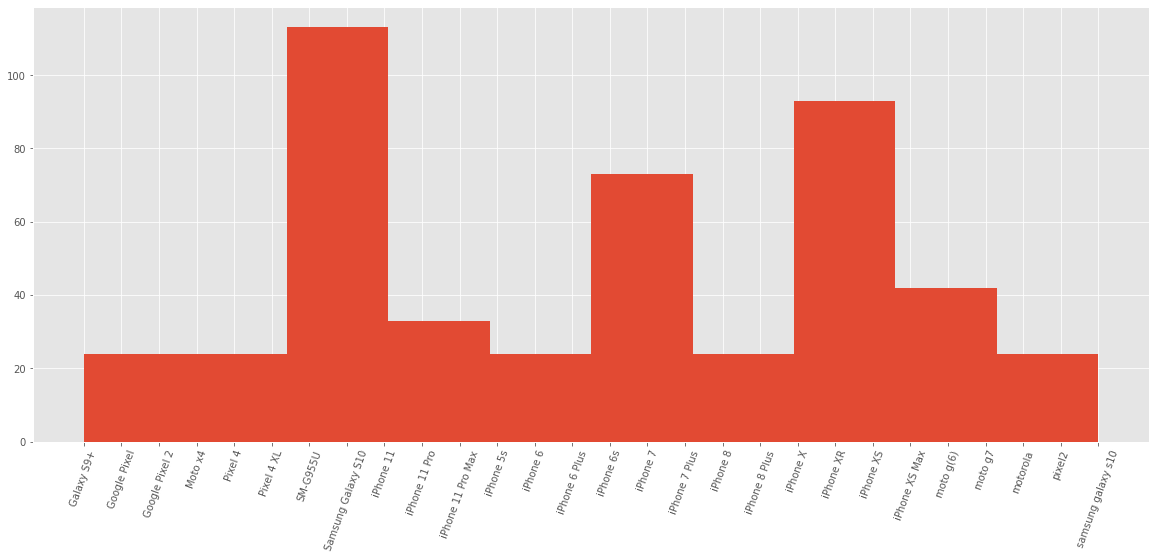

In [88]:
plt.figure(figsize=(20, 8))
data.TX.fillna('unknown').sort_values().hist();
plt.xticks(rotation=70);

In [89]:
sorted(data.RX.fillna('unkown').unique())

['iPhone 11',
 'iPhone 6',
 'iPhone 6s',
 'iPhone 7',
 'iPhone 7 Plus',
 'iPhone 8',
 'iPhone 8 Plus',
 'iPhone X',
 'iPhone XR',
 'iPhone XS',
 'iPhone XS Max']

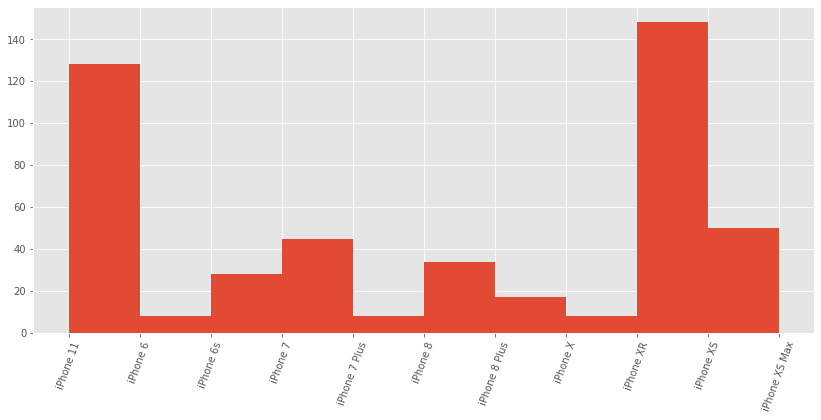

In [90]:
plt.figure(figsize=(14, 6))
data.RX.fillna('unknown').sort_values().hist();
plt.xticks(rotation=70);

## Environments

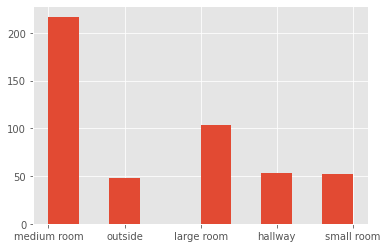

In [91]:
data.Environment_1.hist();

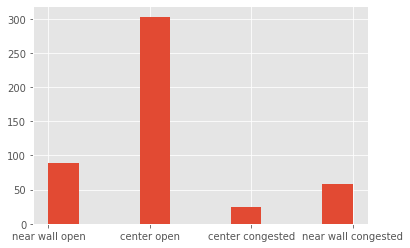

In [92]:
data.Environment_2.hist();

## Range

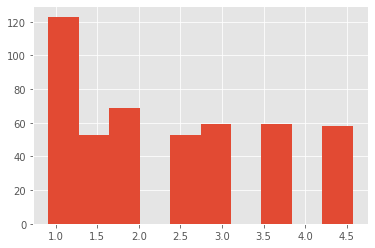

In [93]:
(data.Range/3.281).hist();

## Angle

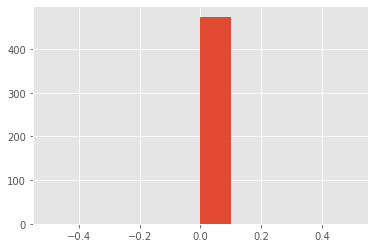

In [94]:
data.Angle.hist();

## Environment Analysis

In [51]:
env_ = data.apply(lambda row: row.Environment_1 + ' | ' + row.Environment_2, axis=1).values

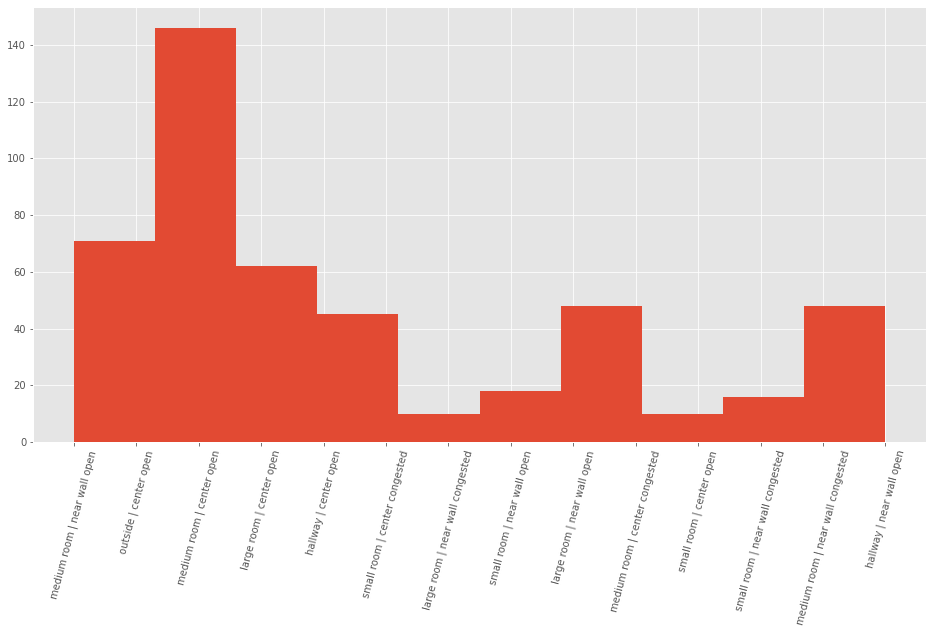

In [61]:
plt.figure(figsize=(16, 8))
plt.hist(env_)
plt.xticks(rotation=75);

In [95]:
data

,Environment_1,Environment_2,TX,RX,Range,Angle,Bluetooth
0,medium room,near wall open,iPhone 11,iPhone XR,10.0,0.0,"[-72.0, -72.0, -73.0, -73.0, -68.0, -68.0, -65..."
1,medium room,near wall open,iPhone 11,iPhone XR,5.0,0.0,"[-64.0, -64.0, -66.0, -66.0, -59.0, -59.0, -63..."
2,medium room,near wall open,iPhone 11,iPhone XR,6.0,0.0,"[-67.0, -67.0, -61.0, -61.0, -70.0, -70.0, -65..."
3,medium room,near wall open,iPhone 11,iPhone XR,4.0,0.0,"[-64.0, -64.0, -63.0, -63.0, -62.0, -62.0, -61..."
4,medium room,near wall open,iPhone 11,iPhone XR,3.0,0.0,"[-51.0, -52.0, -52.0, -52.0, -51.0, -52.0, -51..."
...,...,...,...,...,...,...,...
469,large room,center open,iPhone 11 Pro,iPhone 11,12.0,0.0,"[-65.0, -64.0, -66.0, -72.0, -72.0, -65.0, -65..."
470,large room,center open,iPhone 11 Pro,iPhone 11,4.0,0.0,"[-51.0, -51.0, -53.0, -52.0, -55.0, -55.0, -51..."
471,large room,center open,iPhone 11 Pro,iPhone 11,3.0,0.0,"[-51.0, -51.0, -62.0, -62.0, -68.0, -68.0, -51..."
472,large room,center open,iPhone 11 Pro,iPhone 11,15.0,0.0,"[-68.0, -68.0, -68.0, -68.0, -67.0, -67.0, -67..."


In [96]:
sorted(data.Range.unique())

[3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 12.0, 15.0]

In [97]:
data.sample().reset_index().loc[0].TX

'moto g(6)'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


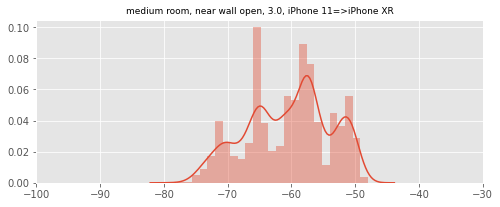

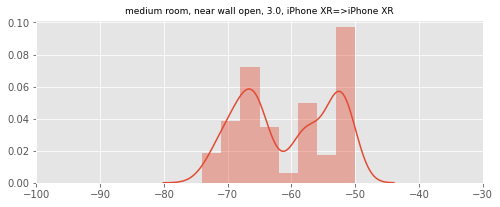

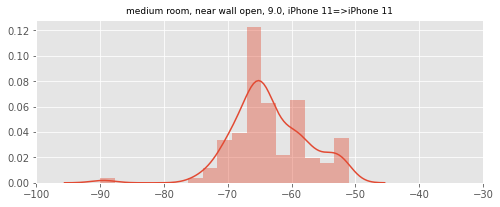

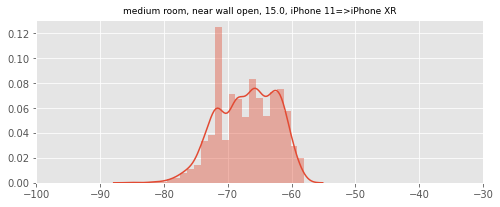

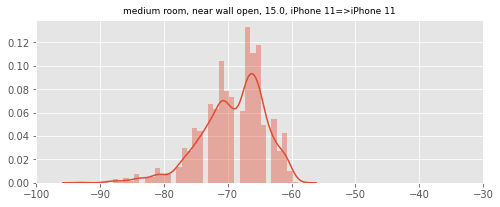

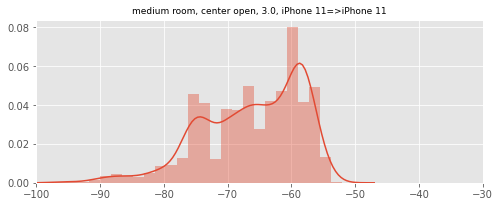

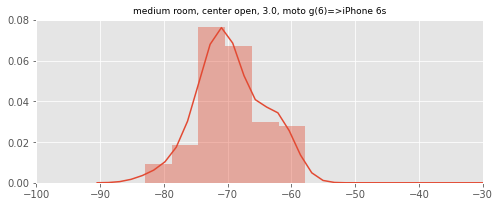

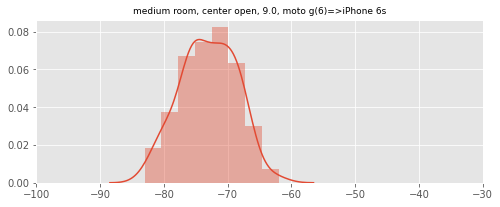

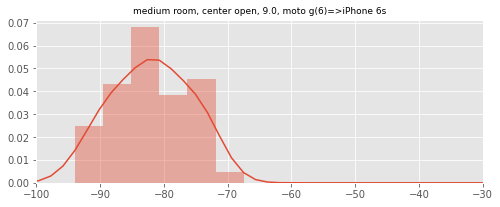

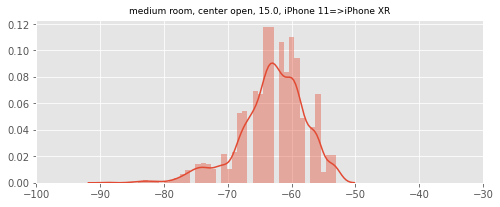

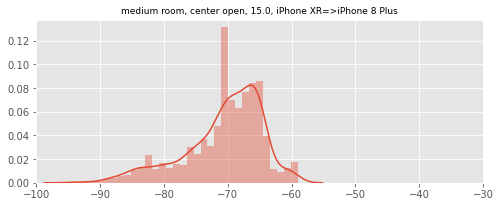

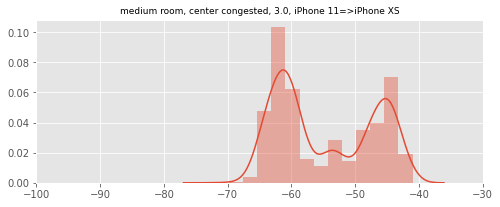

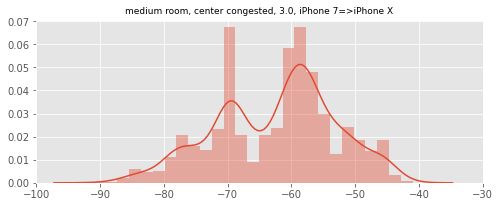

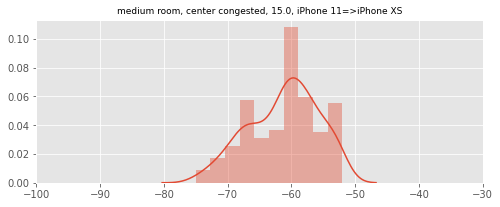

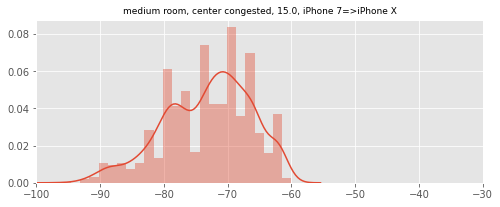

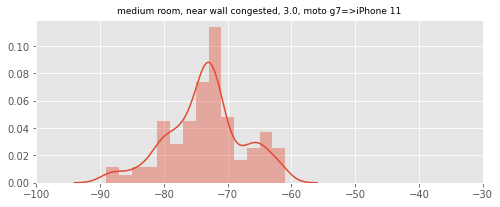

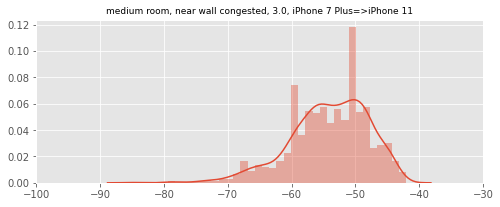

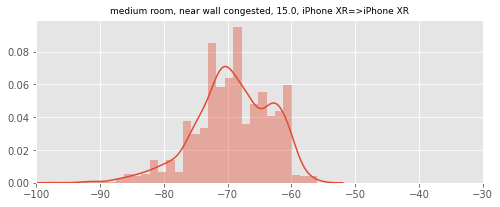

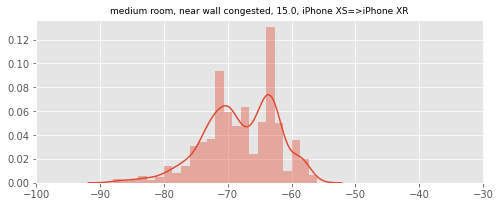

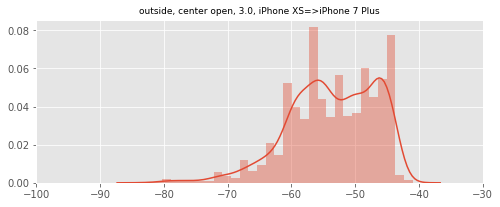

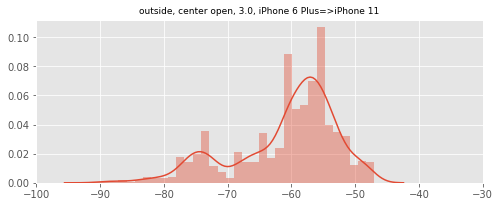

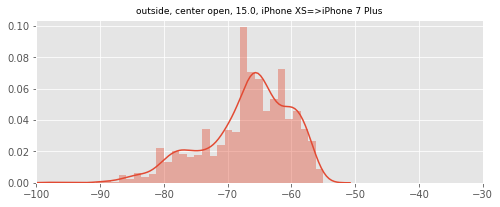

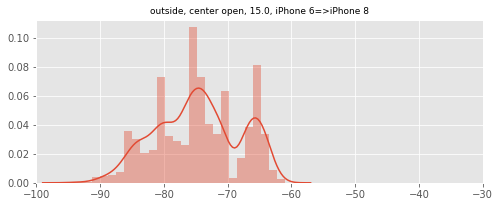

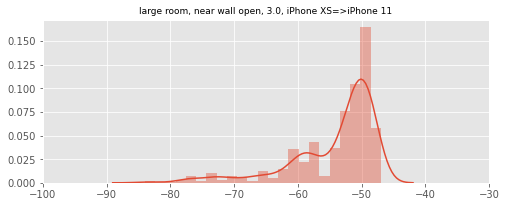

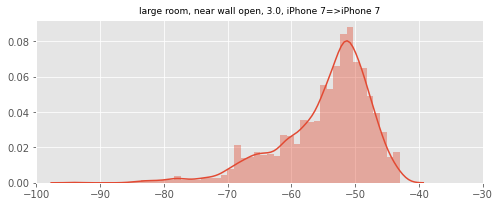

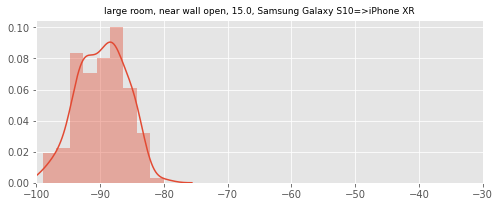

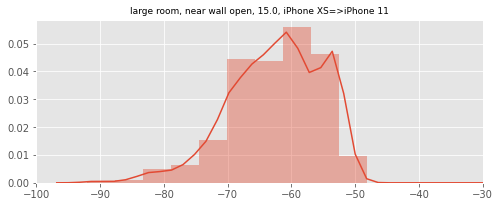

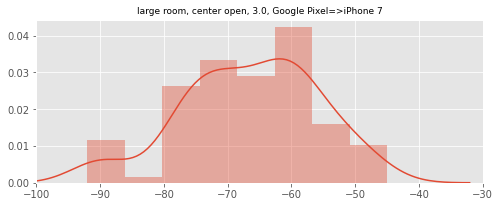

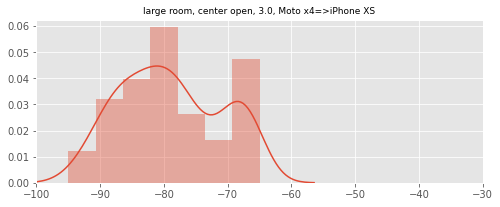

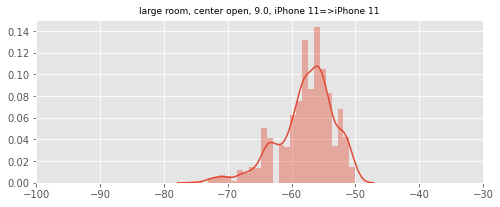

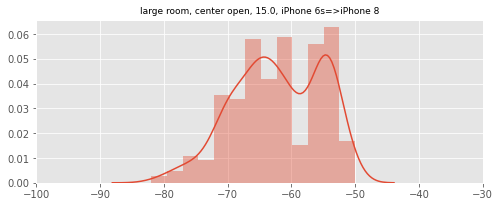

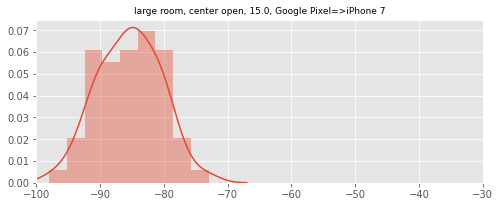

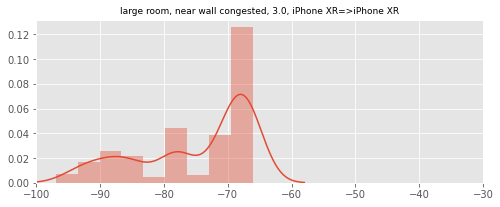

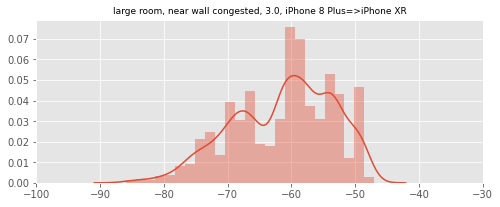

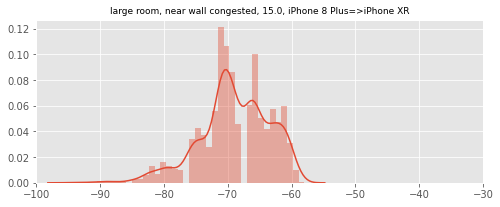

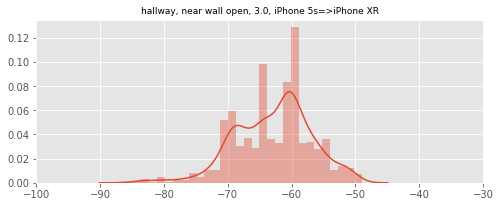

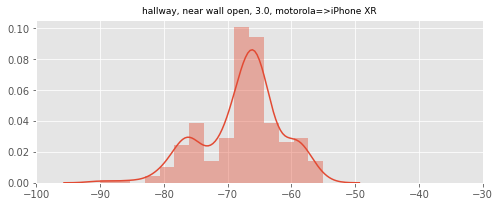

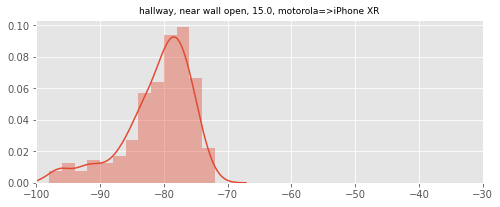

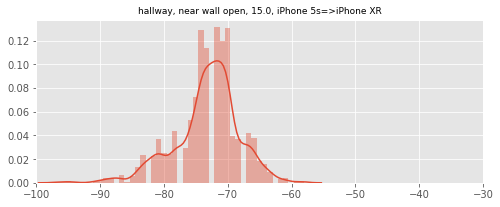

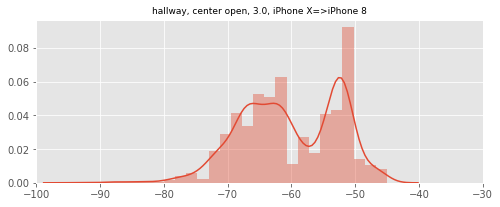

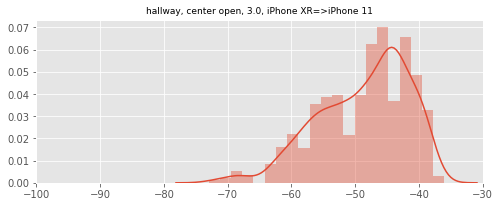

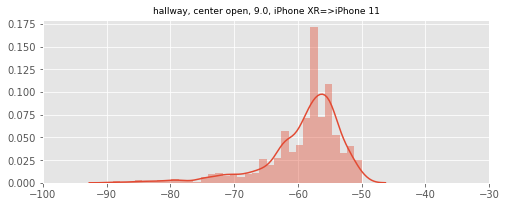

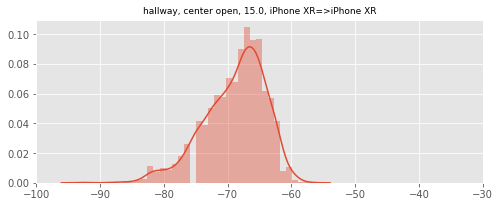

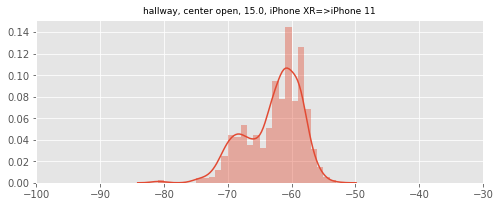

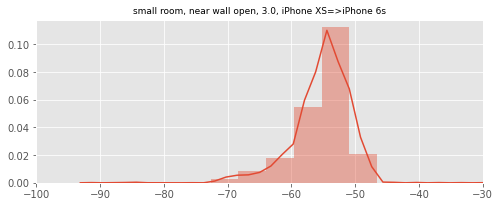

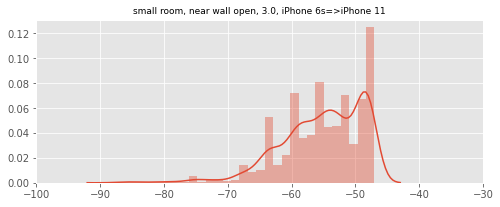

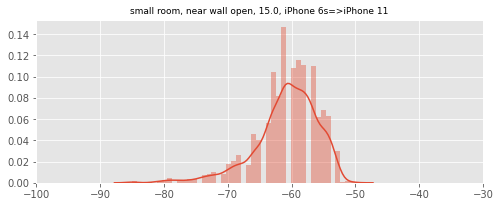

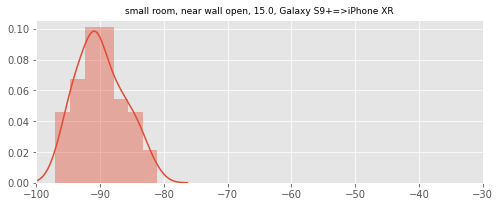

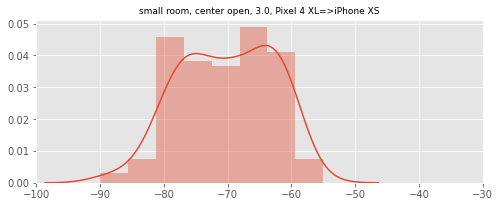

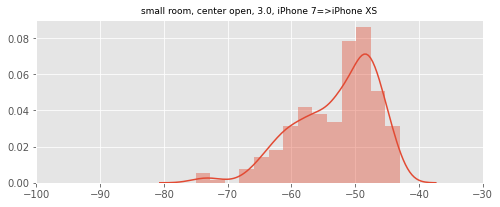

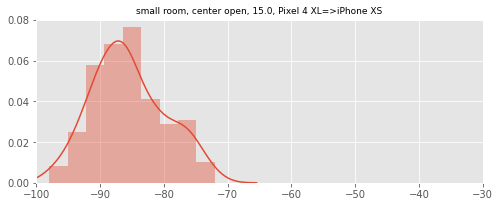

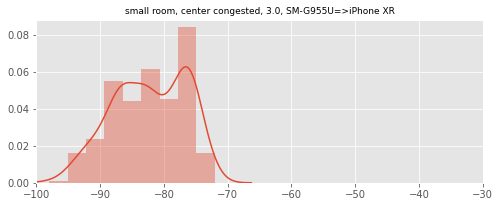

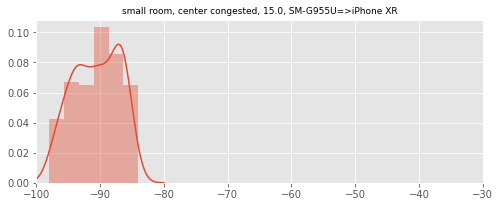

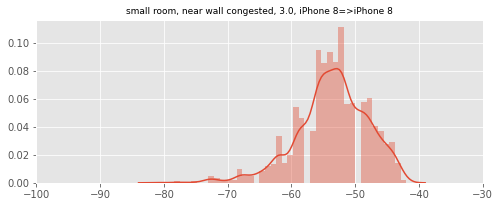

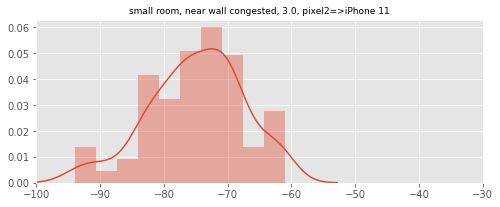

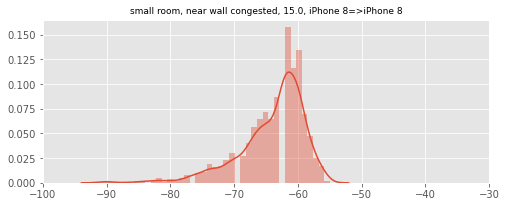

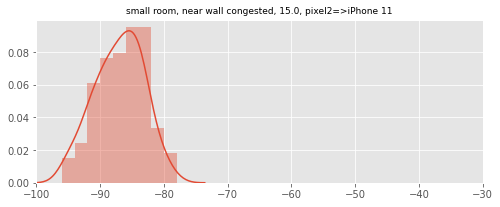

In [98]:
import seaborn as sns

for e1 in data.Environment_1.unique():
    for e2 in data.Environment_2.unique():
        for _range in [3.0, 9.0, 15.0]:
            rows = data[(data.Environment_1 == e1) & (data.Environment_2 == e2) & (data.Range == _range)]
            n_samples = min(2, rows.shape[0])
            rows = rows.sample(n_samples)
            for idx, row in rows.iterrows():
                plt.figure(figsize=(8, 3))
                sns.distplot(row.Bluetooth)
                title = f"{row.Environment_1}, {row.Environment_2}, {row.Range}, {row.TX}=>{row.RX}"
                plt.title(title, fontsize=9)
                plt.xlim(-100, -30)

In [100]:
data.to_csv("data/processed/MITRE-range_angle_structured.Bluetooth.csv", index=False)